In [1]:
import pandas as pd
import os
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
gen_path = os.path.join('..', 'data', 'Plant_1_Generation_Data.csv')
gen = pd.read_csv(gen_path)
weather_path = os.path.join('..', 'data', 'Plant_1_Weather_Sensor_Data.csv ')
weather = pd.read_csv(weather_path)
display(gen.head())
display(weather.head())


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [3]:
gen['DATE_TIME'] = pd.to_datetime(gen['DATE_TIME'])
weather['DATE_TIME'] = pd.to_datetime(weather['DATE_TIME'])
df = pd.merge_asof(
    gen.sort_values('DATE_TIME'), 
    weather.sort_values('DATE_TIME'), on = 'DATE_TIME', 
    by='PLANT_ID',  
    direction='nearest', 
    tolerance=pd.Timedelta('10min')
    )

display(df.head())



C:\Users\Νάσος\AppData\Local\Temp\ipykernel_29212\2125245776.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  gen['DATE_TIME'] = pd.to_datetime(gen['DATE_TIME'])


,DATE_TIME,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15,4135001,zVJPv84UY57bAof,0.0,0.0,0.0,7116151.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15,4135001,zBIq5rxdHJRwDNY,0.0,0.0,0.0,6339380.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,0.0,7007866.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15,4135001,wCURE6d3bPkepu2,0.0,0.0,0.0,6782598.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


In [4]:
print(f"Unique Plant IDs: {df['PLANT_ID'].nunique()}")
print(f"Unique Weather Sensors (SOURCE_KEY_y): {df['SOURCE_KEY_y'].nunique()}")

Unique Plant IDs: 1
Unique Weather Sensors (SOURCE_KEY_y): 1


In [5]:
drop_cols = ['PLANT_ID', 'SOURCE_KEY_y']
df = df.drop(columns = drop_cols, errors='ignore')
print(df.head())
print(f"-------- CHECK FOR MISSING VALUES --------")
print(df.isnull().sum())


   DATE_TIME     SOURCE_KEY_x  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
0 2020-05-15  1BY6WEcLGh8j5v7       0.0       0.0          0.0    6259559.0   
1 2020-05-15  zVJPv84UY57bAof       0.0       0.0          0.0    7116151.0   
2 2020-05-15  zBIq5rxdHJRwDNY       0.0       0.0          0.0    6339380.0   
3 2020-05-15  z9Y9gH1T5YWrNuG       0.0       0.0          0.0    7007866.0   
4 2020-05-15  wCURE6d3bPkepu2       0.0       0.0          0.0    6782598.0   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
0            25.184316           22.857507          0.0  
1            25.184316           22.857507          0.0  
2            25.184316           22.857507          0.0  
3            25.184316           22.857507          0.0  
4            25.184316           22.857507          0.0  
-------- CHECK FOR MISSING VALUES --------
DATE_TIME              0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIE

In [6]:
df =df.dropna()
print(df.isnull().sum())


DATE_TIME              0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


In [7]:
from sklearn.preprocessing import StandardScaler

features = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
X = df[features]
y = df['DC_POWER']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

print(f"Data after standardization")
print(X_scaled_df.head())


Data after standardization
   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
0            -0.111328           -0.681456    -0.769361
1            -0.111328           -0.681456    -0.769361
2            -0.111328           -0.681456    -0.769361
3            -0.111328           -0.681456    -0.769361
4            -0.111328           -0.681456    -0.769361


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)


In [9]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_scaled, y, cv = 5)

print(f"Cross validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV scores: {cv_scores.std():.4f}")

Cross validation scores: [0.98665936 0.9817434  0.98493747 0.96511917 0.97788066]
Average CV score: 0.9793
Standard Deviation of CV scores: 0.0077


In [12]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2 Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

R2 Score: 0.9857
Mean Absolute Error: 168.6092
Root Mean Squared Error: 480.9403


In [14]:
mask = y_test > 10
y_test_sunny = y_test[mask]
y_pred_sunny = y_pred[mask]

from sklearn.metrics import mean_absolute_percentage_error
real_mape = mean_absolute_percentage_error(y_test_sunny, y_pred_sunny)

print(f"Real Percentage Error (only during the day): {real_mape * 100:.2f}%")

Real Percentage Error (only during the day): 5.32%


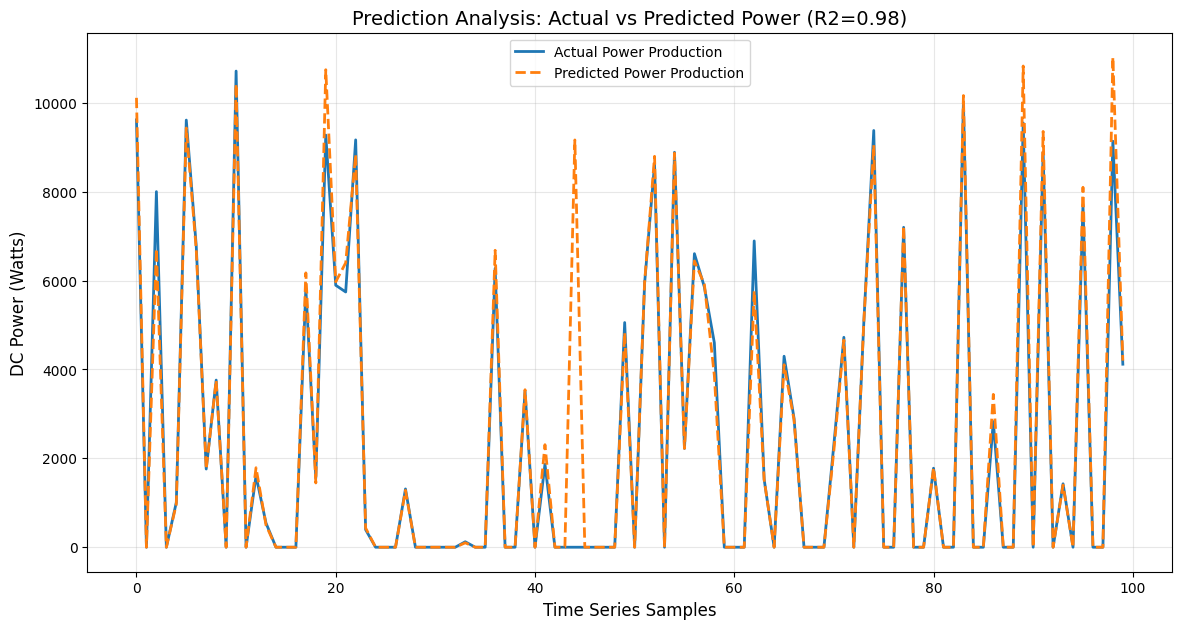

In [15]:
plt.figure(figsize=(14, 7))


plt.plot(y_test.values[:100], label='Actual Power Production', color='#1f77b4', linewidth=2)
plt.plot(y_pred[:100], label='Predicted Power Production', color='#ff7f0e', linestyle='--', linewidth=2)


plt.title('Prediction Analysis: Actual vs Predicted Power (R2=0.98)', fontsize=14)
plt.xlabel('Time Series Samples', fontsize=12)
plt.ylabel('DC Power (Watts)', fontsize=12)

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [16]:
import joblib

joblib.dump(model, 'solar_model.pkl')

joblib.dump(scaler, 'scaler.pkl')

print("Phase 1 Complete: Model and Scaler are saved and ready for Phase 2!")

Phase 1 Complete: Model and Scaler are saved and ready for Phase 2!
